In [1]:
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
from IPython.display import display

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def sample_loader(dataset, split):
  data = tfds.load(dataset, split=split)
  data = data.map(lambda x: (x['image'], x['mask']))
  return tfds.as_numpy(data)

def batch_loader(dataset, split, batch_size):
  do_shuffle = (split == 'train')
  data = tfds.load(dataset, split=split, shuffle_files=do_shuffle)
  data = data.map(lambda x: (x['image'], x['mask']))
  if do_shuffle:
    data = data.shuffle(1024 * 16)
  data = data.batch(batch_size)
  return data

def show_sample(sample):
  image, mask = sample
  mask = np.concatenate([mask]*3, axis=-1)
  viz = np.concatenate([image, mask], axis=1)
  display(Image.fromarray(viz))

coasts_ds = sample_loader('coastlines', 'train')
print(len(coasts_ds), 'samples of coasts')

glaciers_ds = sample_loader('glaciers', 'train')
print(len(glaciers_ds), 'samples of glaciers')

glaciers_iter = iter(glaciers_ds)
coasts_iter = iter(coasts_ds)

2023-11-28 14:19:54.907051: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-11-28 14:19:56.584819: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


420768 samples of coasts
782 samples of glaciers


2023-11-28 14:19:57.125891: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22074 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6


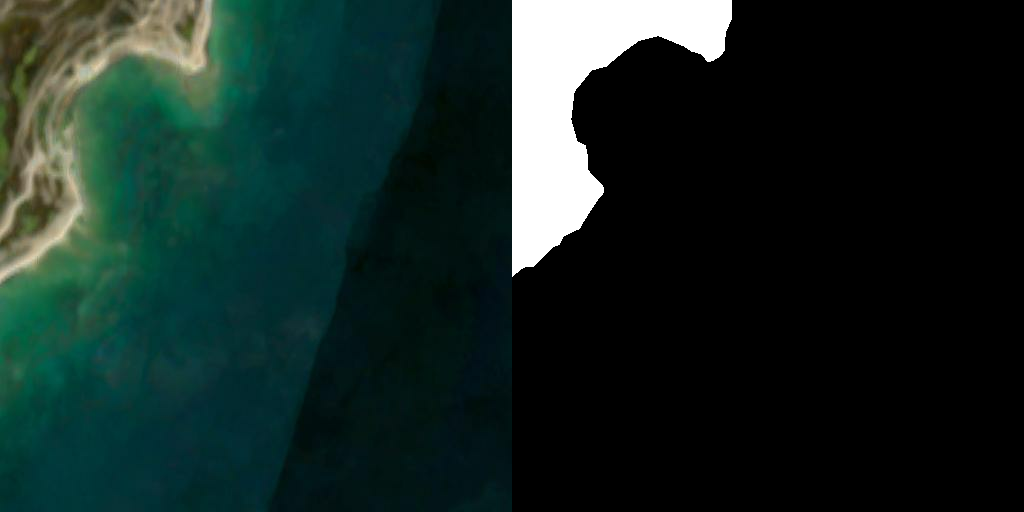

In [4]:
sample = next(coasts_iter)
show_sample(sample)

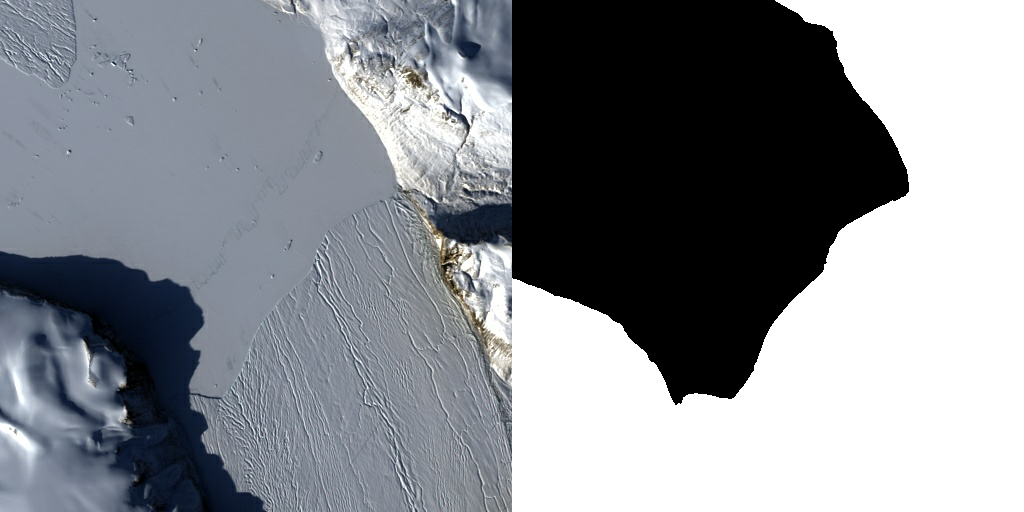

In [5]:
sample = next(glaciers_iter)
show_sample(sample)

In [14]:
loader = batch_loader('glaciers', 'train', 16)

for imagery, masks in loader:
  print('imagery:', imagery.shape)
  print('masks:', masks.shape)
  break

imagery: (16, 512, 512, 3)
masks: (16, 512, 512, 1)
